In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import string

In [ ]:
#importing zipfile
import zipfile

In [ ]:
#extracting the files
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
#reading the data
data = pd.read_csv('/content/spotify_tracks.csv')

In [ ]:
data.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [ ]:
#dropping the column id
data.drop('id',axis=1,inplace=True)

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [ ]:
#importing string library
import string

In [ ]:
#making the function to remove puntuations
punctuationfree = ''
def remove_punctuation(text):
  punctuationfree = ''.join([i for i in text if i not in string.punctuation])
  return punctuationfree

In [ ]:
#importing the nltk library
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#making the function to tokenize
def tokenize(text):
  words = nltk.word_tokenize(text)
  return words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#making the function to remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
#making the function to remove stopwords
def remove_stopwords(text):
  stop_removed = [i for i in text if i not in stopwords]
  return stop_removed

In [ ]:
#making the fucntion to do lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemm = WordNetLemmatizer()

In [ ]:
def lemma(text):
  lemm_text = [lemm.lemmatize(x) for x in text]
  return lemm_text

In [ ]:
data.columns

Index(['name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

In [ ]:
features = data[['name', 'artists', 'album']]

In [ ]:
def preprocess(data,cols):
  for col in cols:
    data[col] = data[col].apply(lambda x: remove_punctuation(x))
    data[col] = data[col].apply(lambda x: x.lower())
    data[col] = data[col].apply(lambda x: tokenize(x))
    data[col] = data[col].apply(lambda x: remove_stopwords(x))
    data[col] = data[col].apply(lambda x: lemma(x))
  return data

In [ ]:
#preprocess(data,features)

In [ ]:
data['genre'].value_counts()

,count
genre,
acoustic,50
new-age,50
punk,50
psych-rock,50
progressive-house,50
...,...
french,50
forro,50
folk,50


In [ ]:
# importing the necessary libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
data.isna().sum()

,0
name,0
genre,0
artists,0
album,0
popularity,0
duration_ms,0
explicit,0


In [ ]:
#importing matplotlib
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b7243a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b7243f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b72437f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b728c4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b728c760>],
 'means': []}

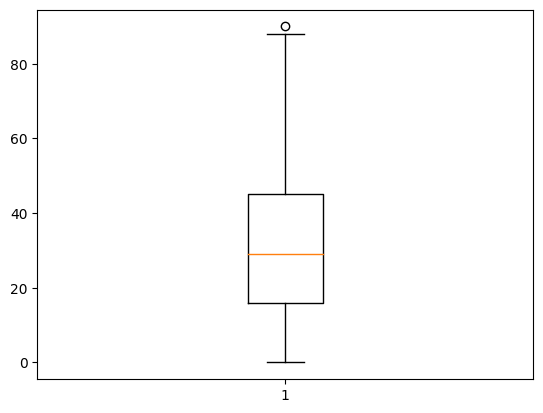

In [ ]:
plt.boxplot(data['popularity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b5156590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b5156ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b51562c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b5157010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b51572b0>],
 'means': []}

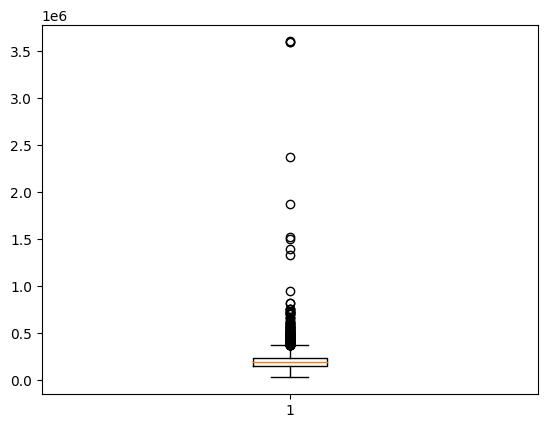

In [ ]:
plt.boxplot(data['duration_ms'])

In [ ]:
#making a function to do outlier capping for all the features
def iqr_capping(data,cols):
  for col in cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)

    iqr = q3 - q1

    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr

    data[col] = np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

In [ ]:
features_1 = data[['popularity','duration_ms']]

In [ ]:
iqr_capping(data,features_1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b51d6380>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b51d68c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b51d60e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b51d6e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b51d70a0>],
 'means': []}

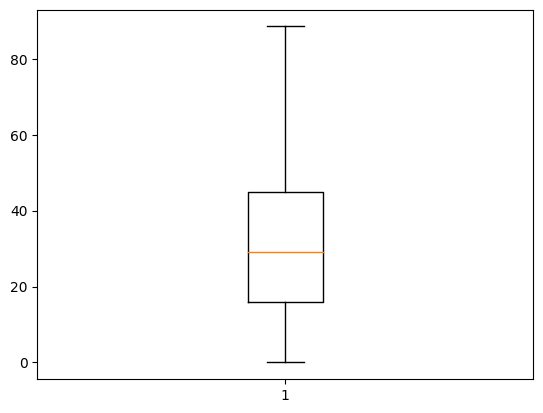

In [ ]:
plt.boxplot(data['popularity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b50549d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b5054f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b5054730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b5055450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b50556f0>],
 'means': []}

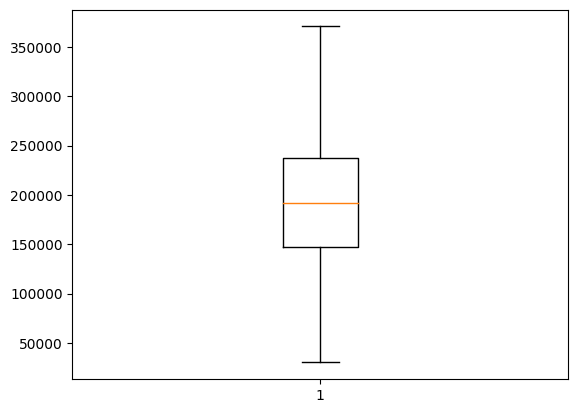

In [ ]:
plt.boxplot(data['duration_ms'])

In [ ]:
scaler = MinMaxScaler()

In [ ]:
#data[['popularity', 'duration_ms']] = scaler.fit_transform(data[['popularity', 'duration_ms']])

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,172199.0,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,172202.0,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,144786.0,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,116573.0,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,133922.0,False


In [ ]:
data['explicit'].value_counts()

,count
explicit,
False,5106
True,1194


In [ ]:
#data['explicit'] = data['explicit'].astype(int)

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,172199.0,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,172202.0,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,144786.0,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,116573.0,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,133922.0,False


In [ ]:
label_encoder = LabelEncoder()
#data['genre'] = label_encoder.fit_transform(data['genre'])

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,172199.0,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,172202.0,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,144786.0,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,116573.0,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,133922.0,False


In [ ]:
data.tail()

,name,genre,artists,album,popularity,duration_ms,explicit
6295,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25.0,180001.0,False
6296,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25.0,276776.0,False
6297,The Daintree,world-music,Joseph Tawadros,World Music,12.0,69533.0,False
6298,The Sorcerers Symphony,world-music,Future World Music,Behold,26.0,90001.0,False
6299,Fiore d'inverno,world-music,"Putumayo, Giacomo Lariccia",World Party 5 by Putumayo,25.0,141800.0,False


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def apply_tfidf(df, columns):
  for col in columns:
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    #print(df[col][1]
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[col][1])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
    #tfidf_df.columns = [f"{col}_{col}" for col in tfidf_df.columns]  # Rename columns
    #df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
  return df


In [ ]:
#columns_to_tfidf = ['name', 'artists', 'album']
#df_with_tfidf = apply_tfidf(data, columns_to_tfidf)

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,172199.0,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,172202.0,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,144786.0,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,116573.0,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,133922.0,False


In [ ]:
#renaming duration column
data = data.rename(columns={'duration_ms': 'duration'})

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,172199.0,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,172202.0,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,144786.0,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,116573.0,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,133922.0,False


In [ ]:
#writing a function to convert miliseconds to minutes
def ms_to_minutes(ms):
  return ms / 60000

In [ ]:
data['duration'] = data['duration'].apply(ms_to_minutes)

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,2.869983,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,2.870033,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,2.413100,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,1.942883,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,2.232033,False


In [ ]:
#rounding the decimal points
data['duration'] = data['duration'].round(2)

In [ ]:
data = data.rename(columns={'duration': 'duration(min)'})

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration(min),explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,2.87,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,2.87,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,2.41,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,1.94,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,2.23,False


In [ ]:
#dropping the duplicates
data = data.drop_duplicates(subset='name', keep='first')

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration(min),explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,2.87,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,2.41,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,1.94,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,2.23,False
6,Beautiful Things - Acoustic,acoustic,Benson Boone,Daydream,0.0,3.35,False


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data.head()

,name,genre,artists,album,popularity,duration(min),explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58.0,2.87,False
1,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,2.41,False
2,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,1.94,False
3,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,2.23,False
4,Beautiful Things - Acoustic,acoustic,Benson Boone,Daydream,0.0,3.35,False


In [ ]:
data.shape

(4518, 7)

In [ ]:
data1 = data[['name','genre']]

In [ ]:
data1.head()

,name,genre
0,Acoustic,acoustic
1,Here Comes the Sun - Acoustic,acoustic
2,Acoustic #3,acoustic
3,My Love Mine All Mine - Acoustic Instrumental,acoustic
4,Beautiful Things - Acoustic,acoustic


In [ ]:
indices = pd.Series(data1.index, index=data1['name'])

In [ ]:
indices

,0
name,
Acoustic,0
Here Comes the Sun - Acoustic,1
Acoustic #3,2
My Love Mine All Mine - Acoustic Instrumental,3
Beautiful Things - Acoustic,4
...,...
Voyage to Atlantis,4513
L'Oiseau,4514
The Daintree,4515


In [ ]:
indices["L'Oiseau"]

4514

In [ ]:
feature = data1['genre'].tolist()

In [ ]:
feature

['acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'acoustic',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'afrobeat',
 'alt-rock',
 'alt-rock',
 'alt-rock',
 'alt-rock',
 'alt-rock',
 'alt-rock',
 'alt-rock',
 'alt-rock',

In [ ]:
cv = CountVectorizer(stop_words='english')

In [ ]:
cv_matrix = cv.fit_transform(feature)

In [ ]:
cv_matrix

<4518x126 sparse matrix of type '<class 'numpy.int64'>'
	with 5695 stored elements in Compressed Sparse Row format>

In [ ]:
cv_matrix.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
cv_matrix.shape

(4518, 126)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(cv_matrix)

In [ ]:
similarity

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [ ]:
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,4508,4509,4510,4511,4512,4513,4514,4515,4516,4517
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
list( enumerate(similarity[3]))

[(0, 1.0),
 (1, 1.0),
 (2, 1.0),
 (3, 1.0),
 (4, 1.0),
 (5, 1.0),
 (6, 1.0),
 (7, 1.0),
 (8, 1.0),
 (9, 1.0),
 (10, 1.0),
 (11, 1.0),
 (12, 1.0),
 (13, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 1.0),
 (18, 1.0),
 (19, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (23, 1.0),
 (24, 1.0),
 (25, 1.0),
 (26, 1.0),
 (27, 1.0),
 (28, 1.0),
 (29, 1.0),
 (30, 1.0),
 (31, 1.0),
 (32, 1.0),
 (33, 1.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.0),
 (82, 0.0),
 (83, 0.0),
 (

In [ ]:
data.columns

Index(['name', 'genre', 'artists', 'album', 'popularity', 'duration(min)',
       'explicit'],
      dtype='object')

WEB APP Area

In [ ]:
import anvil.server

In [ ]:
anvil.server.connect('server_ZMSTZQXZU56HOAAVE5RNPL5F-R2LTIEORBHQ7P76L')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Development" as SERVER


In [ ]:
@anvil.server.callable
def rest_rec_sys(songname,similarity=similarity):
  index = indices[songname]
  similarity_score = list(enumerate(similarity[index]))
  similarity_score = sorted(similarity_score,key=lambda x:x[1],reverse=True)
  similarity_score = similarity_score[0:10]
  res_indices = [i[0] for i in similarity_score]
  #res_rec = data1['Name'].iloc[res_indices]
  #inorder to get multiple information from the dataframe use the below code
  res_rec = data[['name', 'genre', 'artists', 'album', 'popularity', 'duration(min)',
       'explicit']].iloc[res_indices]
  return res_rec.to_dict(orient='records')

In [ ]:
@anvil.server.callable
def rrs():
  res = res_rec_sys(songname)
  return  res

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: 

In [ ]:
#

In [ ]:
import numpy as np
from flask import Flask, request, render_template

app = Flask(__name__)


@app.route('/')
def home():
    return render_template('index.html')

@app.route('/getprediction',methods=['POST'])
def getprediction():

    input = [float(x) for x in request.form.values()]
    final_input = [np.array(input)]
    prediction = model.predict(final_input)

    return render_template('index.html', output='Predicted Weight in KGs :{}'.format(prediction))


if __name__ == "__main__":
    app.run(debug=True)